In [1]:
#import needed library
import pandas as pd
import numpy as np
#loading in dataset
elastic_prop = pd.read_excel("elastic Hole A logs.xlsx")

In [2]:
#displaying loaded dataset
elastic_prop

,depth,Gamma,Density,vp,Vs,shear_modulus,poisson_ratio,young_modulus,real_labels_A,formations,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,161.02,45.0744,2.632998,5795.981453,3695.036335,3.594909e+07,0.157642,8.323239e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161.07,47.9752,2.648486,5783.318340,3701.418877,3.628559e+07,0.153086,8.368083e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161.12,49.2025,2.678836,5798.969072,3680.981595,3.629722e+07,0.162582,8.439702e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161.17,52.2893,2.632898,5769.230769,3671.970624,3.550033e+07,0.159522,8.232685e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161.22,59.3182,2.672184,5742.725881,3671.521234,3.602122e+07,0.154337,8.316123e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091,3.820562e+07,0.120724,8.563593e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13080,815.62,58.4438,2.639210,5810.350170,3792.667509,3.796326e+07,0.128808,8.570644e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13081,815.67,61.1281,2.685878,5832.944470,3769.317753,3.816030e+07,0.141499,8.711986e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13082,815.72,68.6226,2.697876,5886.970173,3768.844221,3.832113e+07,0.152747,8.834917e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#extracting required log columns as x data
features = ['Gamma', 'Density', 'vp', 'Vs']
x_features = elastic_prop.loc[:, features].values

In [4]:
#displaying x dataset
x_features

array([[4.50744000e+01, 2.63299800e+00, 5.79598145e+03, 3.69503633e+03],
       [4.79752000e+01, 2.64848600e+00, 5.78331834e+03, 3.70141888e+03],
       [4.92025000e+01, 2.67883600e+00, 5.79896907e+03, 3.68098160e+03],
       ...,
       [6.11281000e+01, 2.68587800e+00, 5.83294447e+03, 3.76931775e+03],
       [6.86226000e+01, 2.69787600e+00, 5.88697017e+03, 3.76884422e+03],
       [7.79380000e+01, 2.72520400e+00, 5.91575958e+03, 3.75469337e+03]])

In [5]:
#creating x dataframe using extracted logs
pd_x_features = elastic_prop.loc[:, features]

In [6]:
pd_x_features

,Gamma,Density,vp,Vs
0,45.0744,2.632998,5795.981453,3695.036335
1,47.9752,2.648486,5783.318340,3701.418877
2,49.2025,2.678836,5798.969072,3680.981595
3,52.2893,2.632898,5769.230769,3671.970624
4,59.3182,2.672184,5742.725881,3671.521234
...,...,...,...,...
13079,59.7361,2.629264,5804.055100,3811.944091
13080,58.4438,2.639210,5810.350170,3792.667509
13081,61.1281,2.685878,5832.944470,3769.317753
13082,68.6226,2.697876,5886.970173,3768.844221


In [7]:
#extracting lithology logs columns as y dataset
labels_y = elastic_prop.formations

In [8]:
#displaying y datasets
labels_y

0        0
1        0
2        0
3        0
4        0
        ..
13079    6
13080    6
13081    6
13082    6
13083    6
Name: formations, Length: 13084, dtype: int64

In [9]:
#exracting the values of y dataset
labels_y = labels_y.values

In [10]:
labels_y

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [11]:
#importing needed modules
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
#importing needed modules
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

In [13]:
#Splitting logs and lithology into training and testing datasets in ratio 80:20%
logs_train, logs_test, labels_train, labels_test = train_test_split(pd_x_features, labels_y, test_size = 0.2, random_state = 0)

In [14]:
#displaying training set
logs_train

,Gamma,Density,vp,Vs
7367,72.9771,2.970476,6521.739130,3911.852914
12945,64.0352,2.692942,5588.673621,3765.060241
1765,81.0864,2.689010,5643.340858,3618.381377
8157,113.5900,2.773844,6134.969325,3754.693367
12376,10.1079,3.123024,6622.516556,4000.000000
...,...,...,...,...
4859,62.6544,2.864832,5968.169761,3785.488959
3264,54.8477,2.760670,5769.230769,3698.680804
9845,103.8570,2.721180,5778.120185,3763.643207
10799,56.5732,2.832392,5743.458839,3796.507213


In [15]:
#displaying testing set
logs_test

,Gamma,Density,vp,Vs
7959,75.9976,2.951230,6531.204644,3896.609949
2070,87.4757,2.674858,5582.433941,3646.529719
1453,138.2970,2.685794,5355.230275,3658.536585
6308,195.3910,2.690002,5724.462537,3783.102144
7985,50.8303,2.936022,6570.302234,3917.471925
...,...,...,...,...
773,82.1184,2.683728,5610.972569,3690.036900
8175,109.0740,2.844430,6132.461161,3783.102144
7276,136.1770,2.890836,6045.137023,3712.871287
7683,73.5714,3.002748,6457.167456,3900.156006


In [16]:
#displaying tesing labels
labels_test

array([5, 0, 0, ..., 4, 5, 6], dtype=int64)

In [17]:
#standardizing training and testing x datasets
scaler = StandardScaler()
scaler.fit(logs_train)
logs_train_norm = scaler.transform(logs_train) 
logs_test_norm = scaler.transform(logs_test)
logs_train_norm

array([[-0.11772433,  1.21159129,  1.51674391,  1.23983722],
       [-0.2283735 , -0.60252259, -0.94420736,  0.00381417],
       [-0.01737795, -0.62822429, -0.80002305, -1.23125058],
       ...,
       [ 0.26439079, -0.41794359, -0.44454388, -0.00811753],
       [-0.32071004,  0.30899881, -0.53596284,  0.26860383],
       [-0.13991876, -0.65647524, -0.61673335, -0.78001863]])

In [18]:
#creating a dataframe of training x dataset
pd_train = pd.DataFrame(logs_train_norm, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [19]:
#displaying training set dataframe using standardizied values
pd_train

,Gamma,Density,vp,Vs
0,-0.117724,1.211591,1.516744,1.239837
1,-0.228374,-0.602523,-0.944207,0.003814
2,-0.017378,-0.628224,-0.800023,-1.231251
3,0.384829,-0.073703,0.496642,-0.083477
4,-0.895683,2.208728,1.782543,1.982053
...,...,...,...,...
10462,-0.245460,0.521044,0.056710,0.175828
10463,-0.342062,-0.159815,-0.467990,-0.555114
10464,0.264391,-0.417944,-0.444544,-0.008118
10465,-0.320710,0.308999,-0.535963,0.268604


In [20]:
pd_train_2 = pd.DataFrame(logs_train, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [21]:
pd_train_2

,Gamma,Density,vp,Vs
7367,72.9771,2.970476,6521.739130,3911.852914
12945,64.0352,2.692942,5588.673621,3765.060241
1765,81.0864,2.689010,5643.340858,3618.381377
8157,113.5900,2.773844,6134.969325,3754.693367
12376,10.1079,3.123024,6622.516556,4000.000000
...,...,...,...,...
4859,62.6544,2.864832,5968.169761,3785.488959
3264,54.8477,2.760670,5769.230769,3698.680804
9845,103.8570,2.721180,5778.120185,3763.643207
10799,56.5732,2.832392,5743.458839,3796.507213


In [22]:
#creating testing set dataframe using standardizing values
pd_test = pd.DataFrame(logs_test_norm, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [23]:
#displaying created standardized testing dataframe
pd_test

,Gamma,Density,vp,Vs
0,-0.080348,1.085789,1.541709,1.111488
1,0.061685,-0.720729,-0.960664,-0.994236
2,0.690559,-0.649246,-1.559912,-0.893136
3,1.397054,-0.621740,-0.586065,0.155731
4,-0.391774,0.986381,1.644829,1.287150
...,...,...,...,...
2612,-0.004608,-0.662750,-0.885394,-0.627897
2613,0.328947,0.387686,0.490027,0.155731
2614,0.664326,0.691021,0.259710,-0.435627
2615,-0.110370,1.422539,1.346437,1.141347


In [24]:
pd_test_2 = pd.DataFrame(logs_test, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [25]:
pd_test_2

,Gamma,Density,vp,Vs
7959,75.9976,2.951230,6531.204644,3896.609949
2070,87.4757,2.674858,5582.433941,3646.529719
1453,138.2970,2.685794,5355.230275,3658.536585
6308,195.3910,2.690002,5724.462537,3783.102144
7985,50.8303,2.936022,6570.302234,3917.471925
...,...,...,...,...
773,82.1184,2.683728,5610.972569,3690.036900
8175,109.0740,2.844430,6132.461161,3783.102144
7276,136.1770,2.890836,6045.137023,3712.871287
7683,73.5714,3.002748,6457.167456,3900.156006


In [96]:
#writing to excel
from pandas import ExcelWriter
logs_test = pd.ExcelWriter('Desktop\logs_test.xlsx')
pd_test_2.to_excel(logs_test)
logs_test.save()

In [26]:
#optimization and tuning of hyperparameters
grid_parameter = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'max_depth': [1, 5, 10, 15, 20, 25], 'min_samples_split': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.01, 0.1]}
classifier = GradientBoostingClassifier(random_state = 0)
grid_search = GridSearchCV(estimator = classifier, param_grid = grid_parameter, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [27]:
#training GBDT model using varied values of hyperparameters
import time
start = time.process_time()
grid_search = grid_search.fit(logs_train_norm, labels_train)
end = time.process_time()
print(end-start) 

164.78125


In [29]:
#estimating the highest performance accuracy score and optimal values for hyperparameters
svc_best_accuracy = grid_search.best_score_
svc_best_parameters = grid_search.best_params_

In [30]:
print('%.4f'%svc_best_accuracy)
print(svc_best_parameters)

0.8461
{'learning_rate': 0.1, 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}


In [26]:
#applying optimized paratemers to train GBDT Classifer, and display time of training
import time
start = time.process_time()
gbt_classifier =  GradientBoostingClassifier(n_estimators = 80, max_depth = 25, min_samples_split = 5, min_samples_leaf = 5, learning_rate = 0.1, random_state = 0)
gbt_classifier.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf = cross_val_score(estimator = gbt_classifier, X = logs_train_norm, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

911.203125


In [27]:
#making prediction based on standardized training dataset
labels_train_pred =gbt_classifier.predict(logs_train_norm)

In [28]:
#estimating accuracy of prediction based on standardized training set
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred))

Accuracy: 1.0


In [29]:
#making predictions based on standardized  reserved testing set
labels_test_pred = gbt_classifier.predict(logs_test_norm)

In [30]:
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred))

Accuracy: 0.8379824226213222


In [84]:
#applying optimized paratemers to RF Classifer
#import time
#start = time.process_time()
#gbt_classifier_2 =  GradientBoostingClassifier(n_estimators = 80, max_depth = 25, min_samples_split = 5, min_samples_leaf = 5, learning_rate = 0.02, random_state = 0)
#gbt_classifier_2.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
#scores_rf = cross_val_score(estimator = gbt_classifier_2, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

548.671875


In [85]:
#labels_train_pred_2 =gbt_classifier_2.predict(logs_train_norm)

In [86]:
#from sklearn import metrics
#print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred_2))

Accuracy: 0.999808923282698


In [87]:
#labels_test_pred_2 = gbt_classifier_2.predict(logs_test_norm)

In [88]:
#print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred_2))

Accuracy: 0.8330149025601834


In [37]:
#estimating evaluation metrics based on the training dataset for each lithology
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3361
           1     1.0000    1.0000    1.0000       889
           2     1.0000    1.0000    1.0000       762
           3     1.0000    1.0000    1.0000       572
           4     1.0000    1.0000    1.0000       700
           5     1.0000    1.0000    1.0000       621
           6     1.0000    1.0000    1.0000      2519
           7     1.0000    1.0000    1.0000      1043

    accuracy                         1.0000     10467
   macro avg     1.0000    1.0000    1.0000     10467
weighted avg     1.0000    1.0000    1.0000     10467



In [38]:
#estimating evaluation metrics based on the testing dataset for each lithology
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.7662    0.8130    0.7889       786
           1     0.9252    0.9167    0.9209       216
           2     0.9253    0.8895    0.9070       181
           3     0.6884    0.6835    0.6859       139
           4     0.9634    0.9246    0.9436       199
           5     0.8902    0.9506    0.9194       162
           6     0.7879    0.7385    0.7624       654
           7     0.9964    0.9964    0.9964       280

    accuracy                         0.8380      2617
   macro avg     0.8679    0.8641    0.8656      2617
weighted avg     0.8389    0.8380    0.8379      2617



In [39]:
#creating a dataframe of actual testing labels and predicted labels
df_4 = pd.DataFrame({'true': labels_test, 'prediction':labels_test_pred})

In [40]:
df_4

,true,prediction
0,5,5
1,0,0
2,0,0
3,3,3
4,5,5
...,...,...
2612,0,0
2613,4,4
2614,4,4
2615,5,5


In [41]:
#writing to excel
from pandas import ExcelWriter
gbt_stra_pred = pd.ExcelWriter('Desktop\gbt_stra_pred.xlsx')
df_4.to_excel(gbt_stra_pred)
gbt_stra_pred.save()

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix # n_estimator 80
import itertools

In [33]:
#estimating confusion matrix
cm = pd.DataFrame(confusion_matrix(labels_test, labels_test_pred), index = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'], columns = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'])
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

C:\Users\Obehi\AppData\Local\Temp\ipykernel_22588\3545513201.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


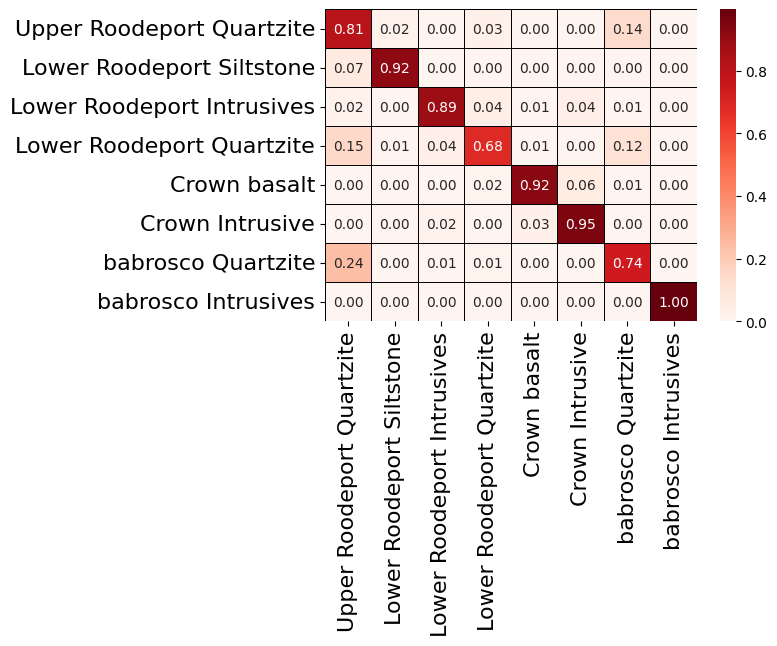

In [37]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm_norm, annot = True, fmt = '.2f', linewidth = 0.5, linecolor = 'black', cmap = 'Reds')
plt.subplots_adjust(bottom = 0.1)
#plt.set_xticks(tickmarks, minor = True)
plt.grid(True, which = 'minor', linestyle = '-')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.tick_params(axis = 'both', width = 4, lenght = 4)
plt.savefig('used_paper_A_strati_gbt_matrix.svg', format = 'svg', dpi = 600)

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [47]:
#estimation performance accuracy for varied value of number of boosting stage 

#x = x_train_norm
#y =  y_train
K1 =[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
n_score = []
# loop through range  values of n_stimators
for X1 in K1:
    #mpement  GBDTClassifier with n_estimators
    classifier_score =  GradientBoostingClassifier(n_estimators = X1, max_depth = 25, min_samples_split = 5, min_samples_leaf = 5, learning_rate = 0.1, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.8323321115962752, 0.8387338128970873, 0.8402621712586813, 0.8422688150246265, 0.8434154033832438, 0.8421732127301714, 0.8453258056798904, 0.8460898935499953, 0.8440832497840501, 0.8439874648682112, 0.8443701479781074, 0.8429362048719733]


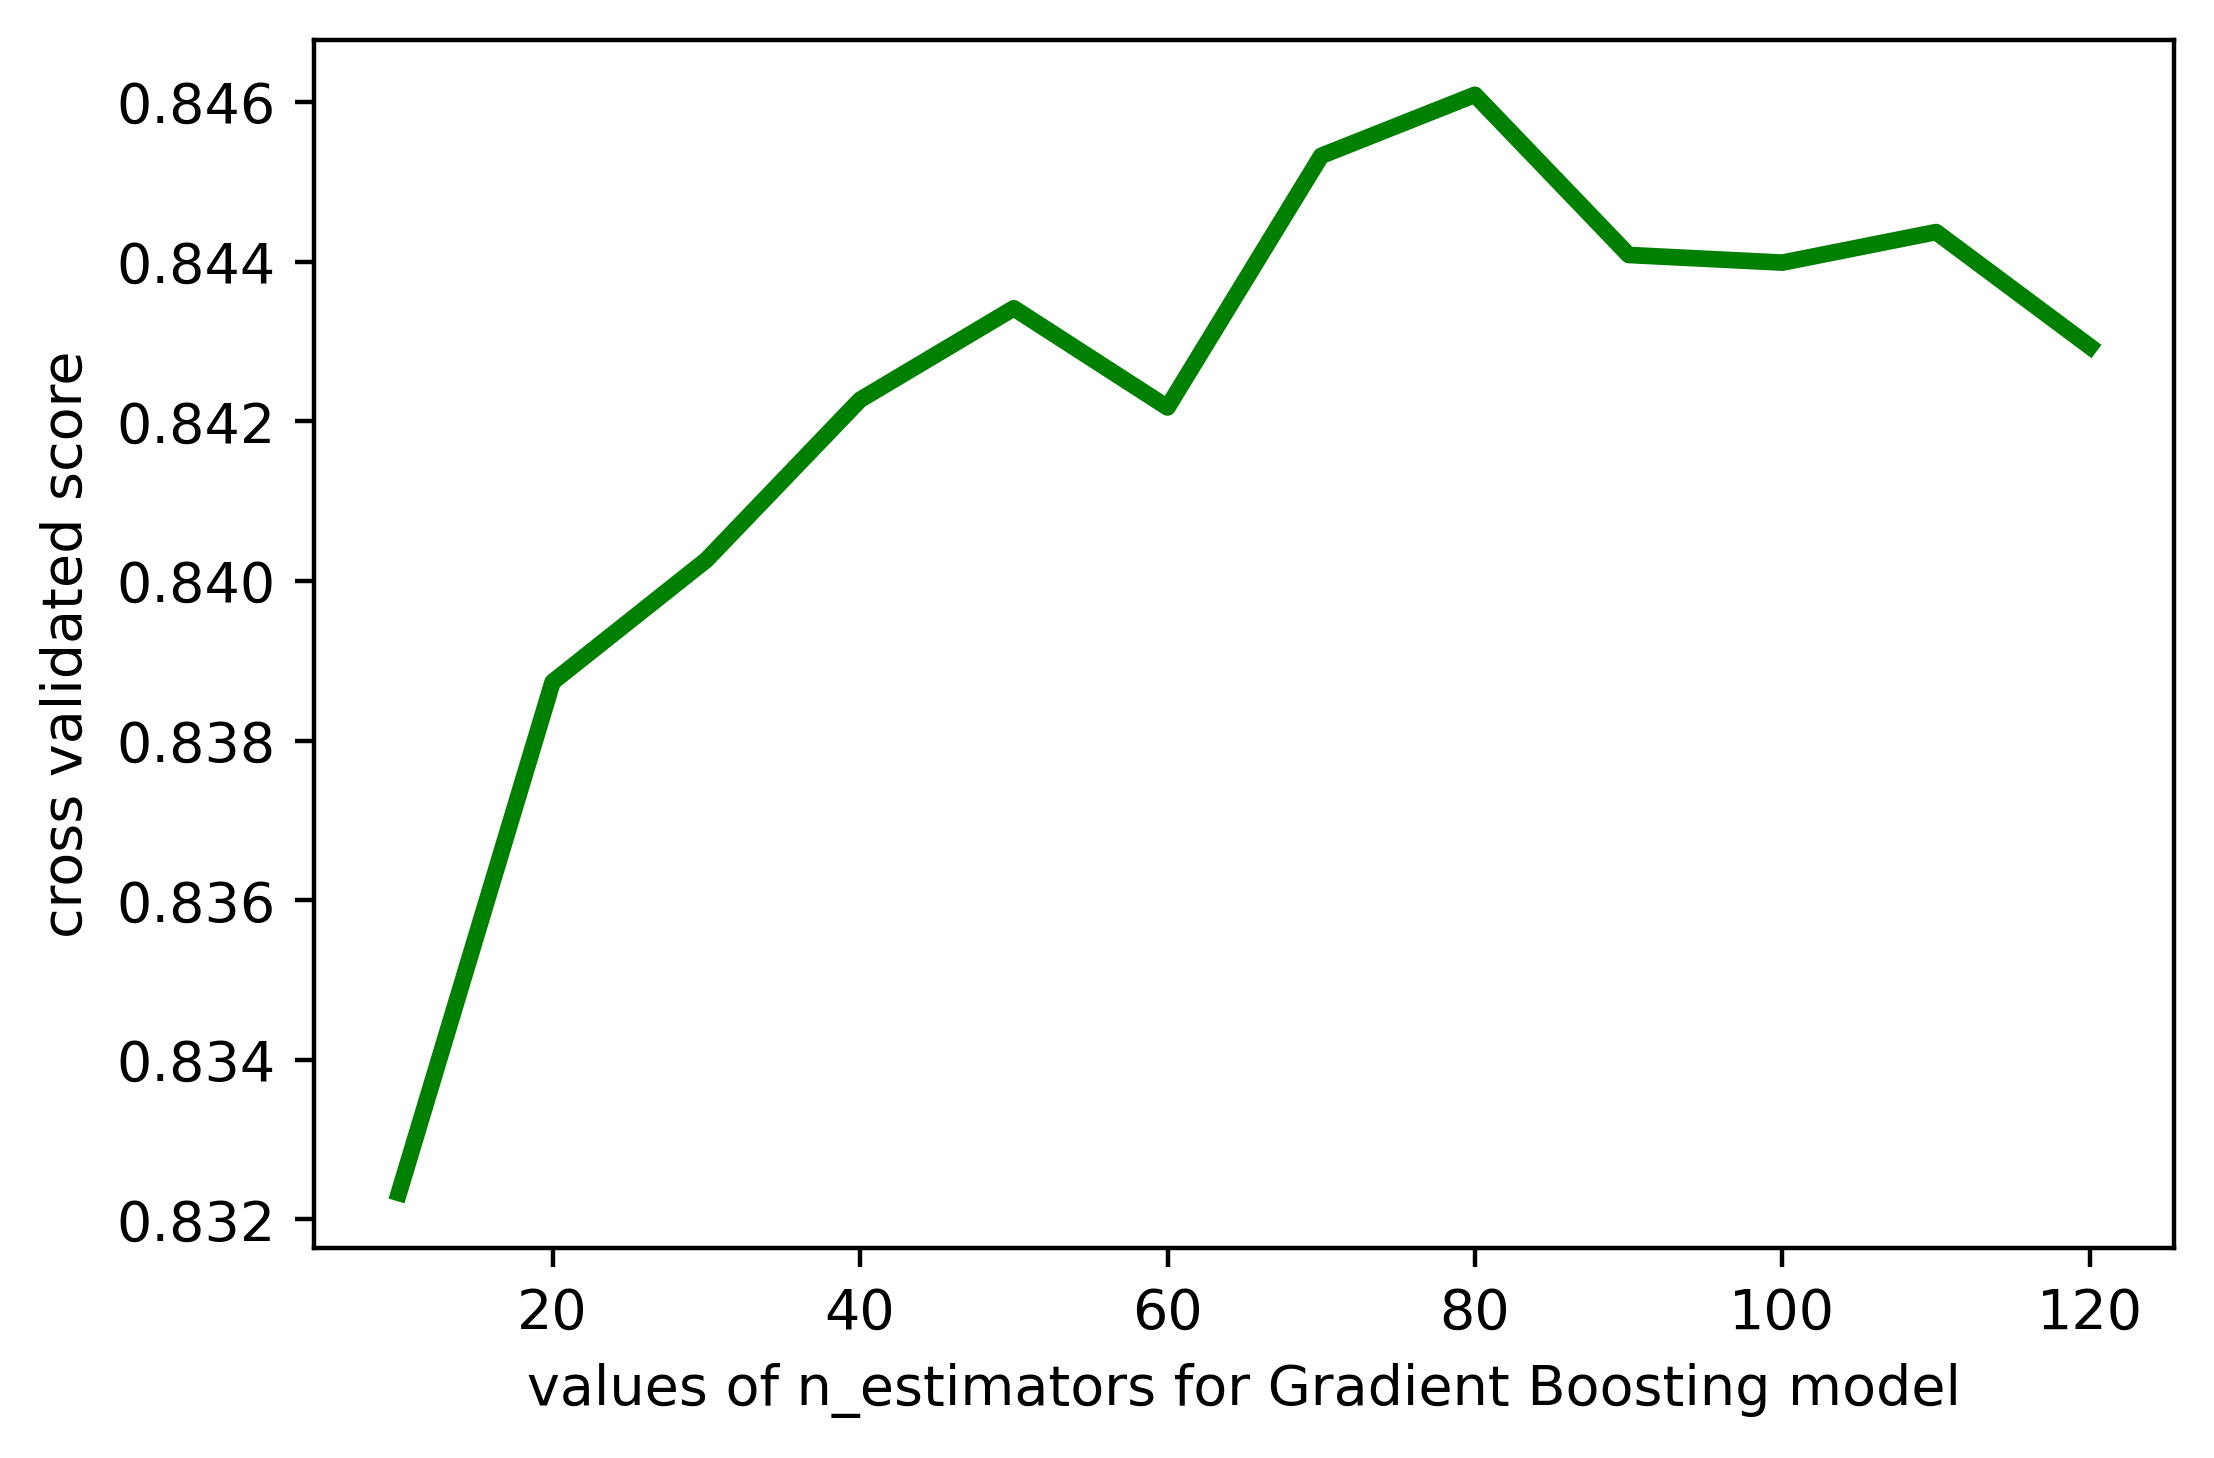

In [48]:
#plot the value of n_estimators for GBDT classifier (x-axis) versus the cross validated accuracy (y-axis)

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of n_estimators for Gradient Boosting model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/stra_GBDT_n_estimators_values_used.svg', format = 'svg', dpi = 400)
plt.show()

In [49]:
#estimating performance accuracy for varied value of maximum depth

#x = x_train_norm
#y =  y_train
K1 = [1, 5, 10, 15, 20, 25]
n_score = []
# loop through range  values of maximum depth
for x1 in K1:
    #mpement GBDTClassifier with maximum depth
    classifier_score =  GradientBoostingClassifier(n_estimators = 80, max_depth = x1, min_samples_split = 5, min_samples_leaf = 5, learning_rate = 0.1, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.7931593682030604, 0.837682826832925, 0.8422687237139345, 0.8437019363345332, 0.8436066079721538, 0.8460898935499953]


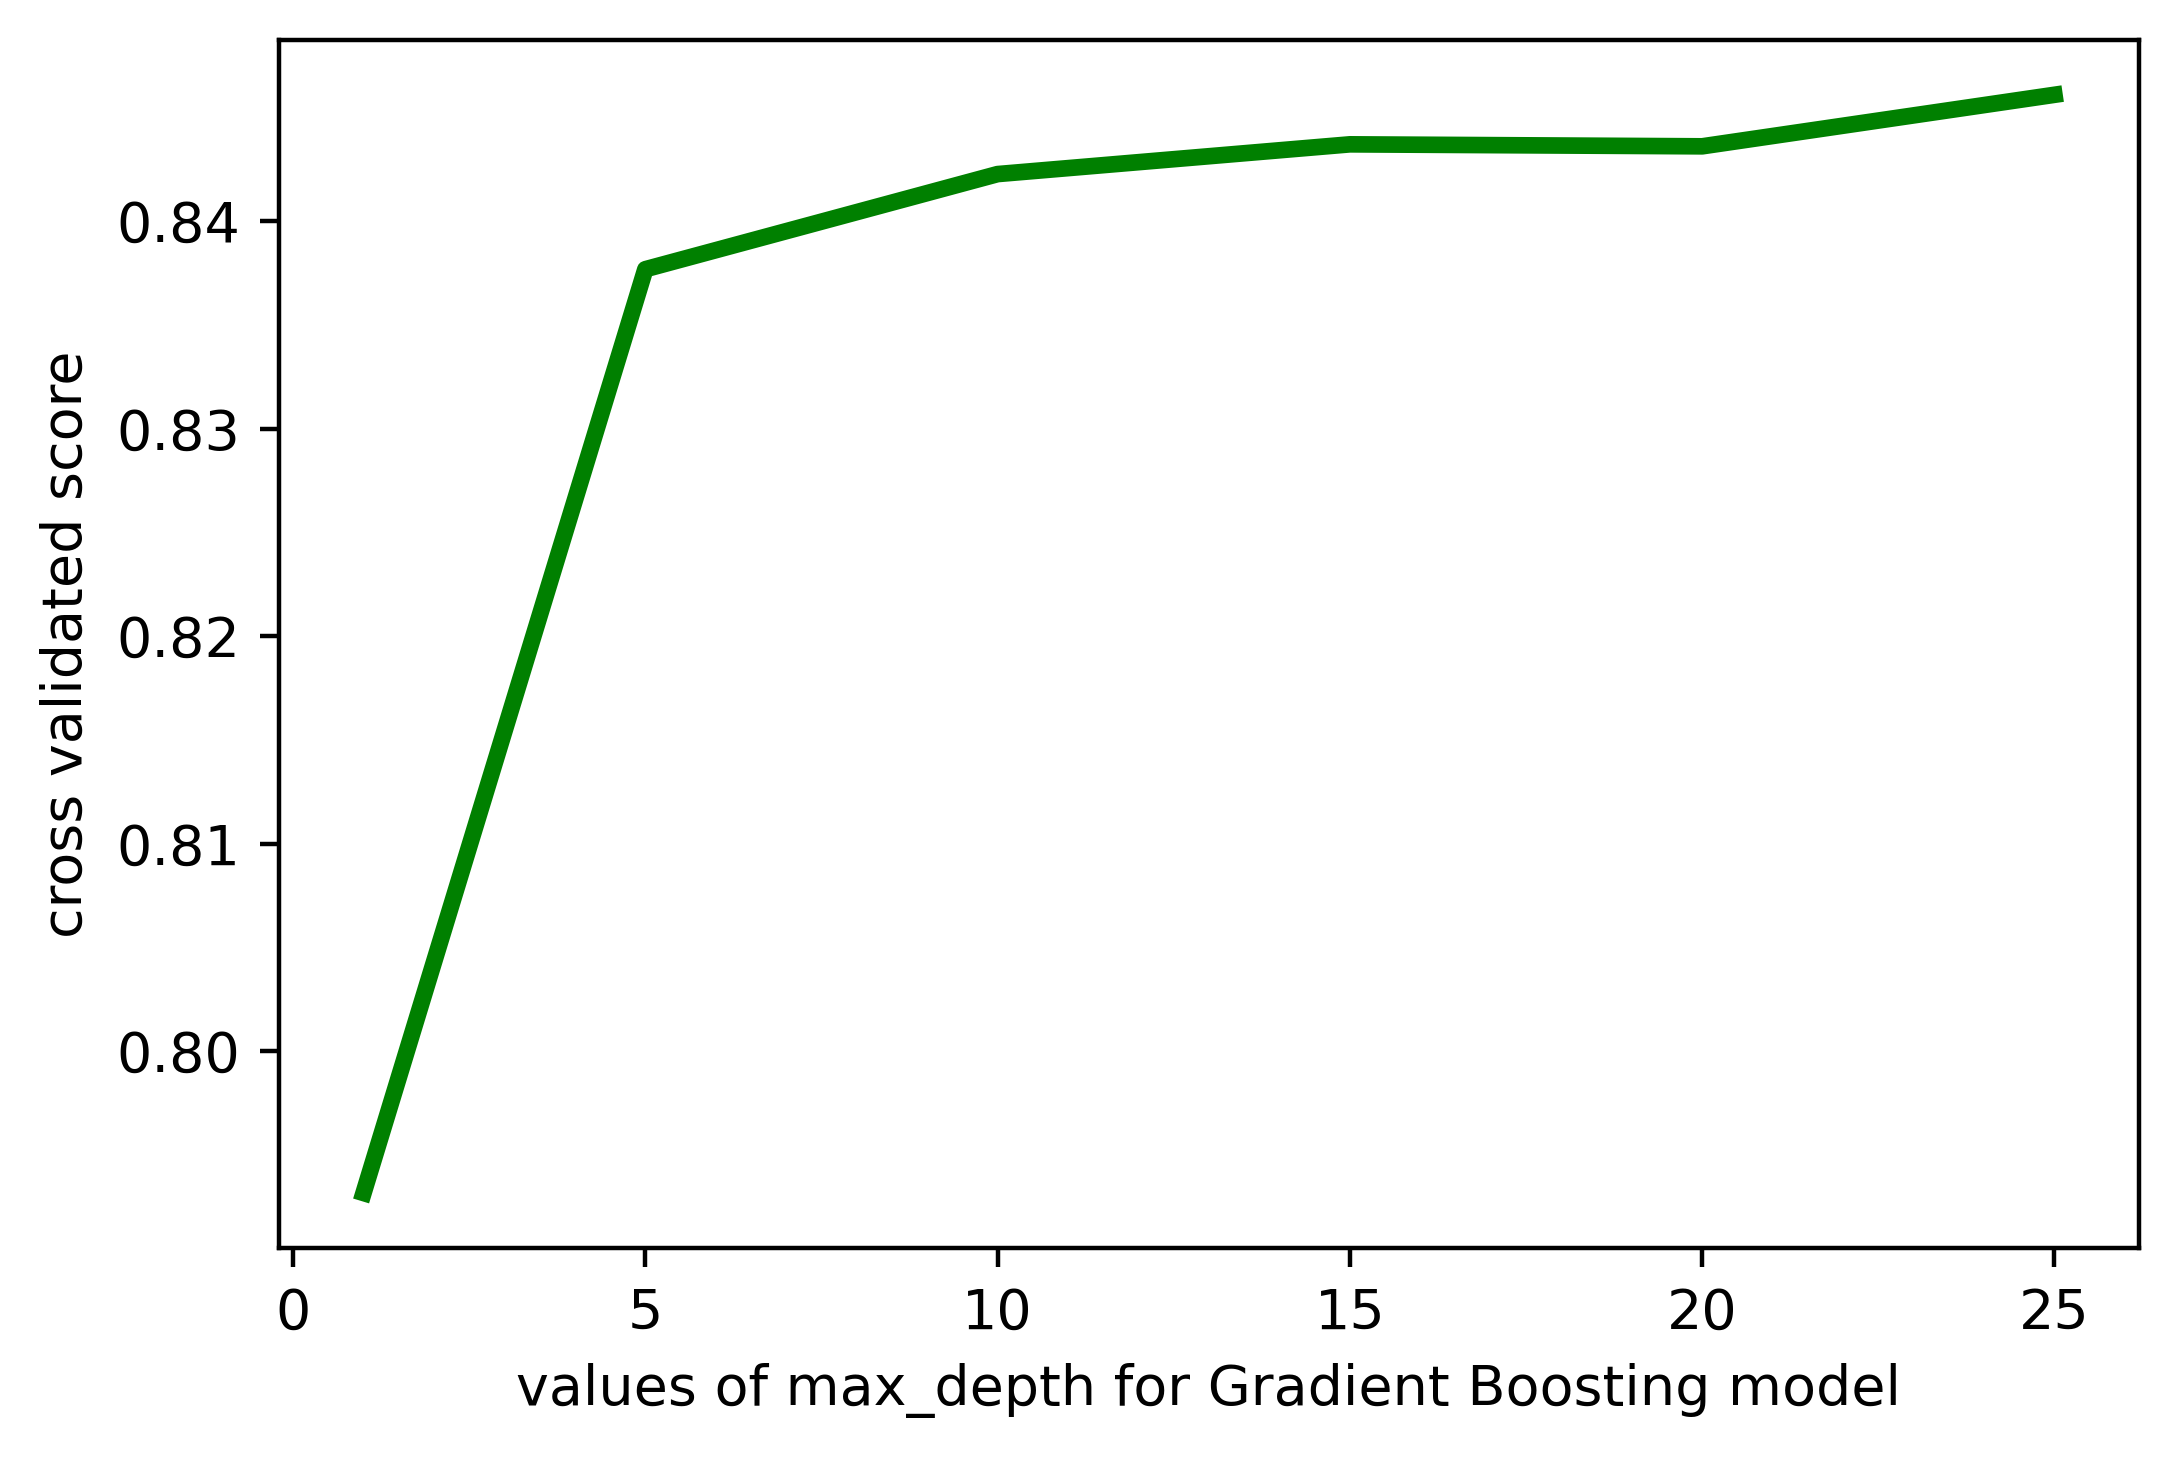

In [51]:
#plot the value of maximum depth for GBDTClassifier (x-axis) versus the cross validated accuracy (y-axis)
x = [1, 5, 10, 15, 20, 25]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of max_depth for Gradient Boosting model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/stra_GBDT_max_depth_values.svg', format = 'svg', dpi = 600)
plt.show()

In [54]:
#estimating performance accuracy for varied value of minimum sample split

#x = x_train_norm
#y =  y_train
K1 = [5, 10, 15, 20, 25, 30]
n_score = []
# loop through range  valuesof minimum sample split
for x1 in K1:
    #mpement  GBDTClassifier with minimum sample split
    classifier_score =  GradientBoostingClassifier(n_estimators = 80, max_depth = 25, min_samples_split = x1, min_samples_leaf = 5, learning_rate = 0.1, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.8460898935499953, 0.8460898935499953, 0.8442739065088087, 0.8433186140497936, 0.8431282312571108, 0.8395920420905766]


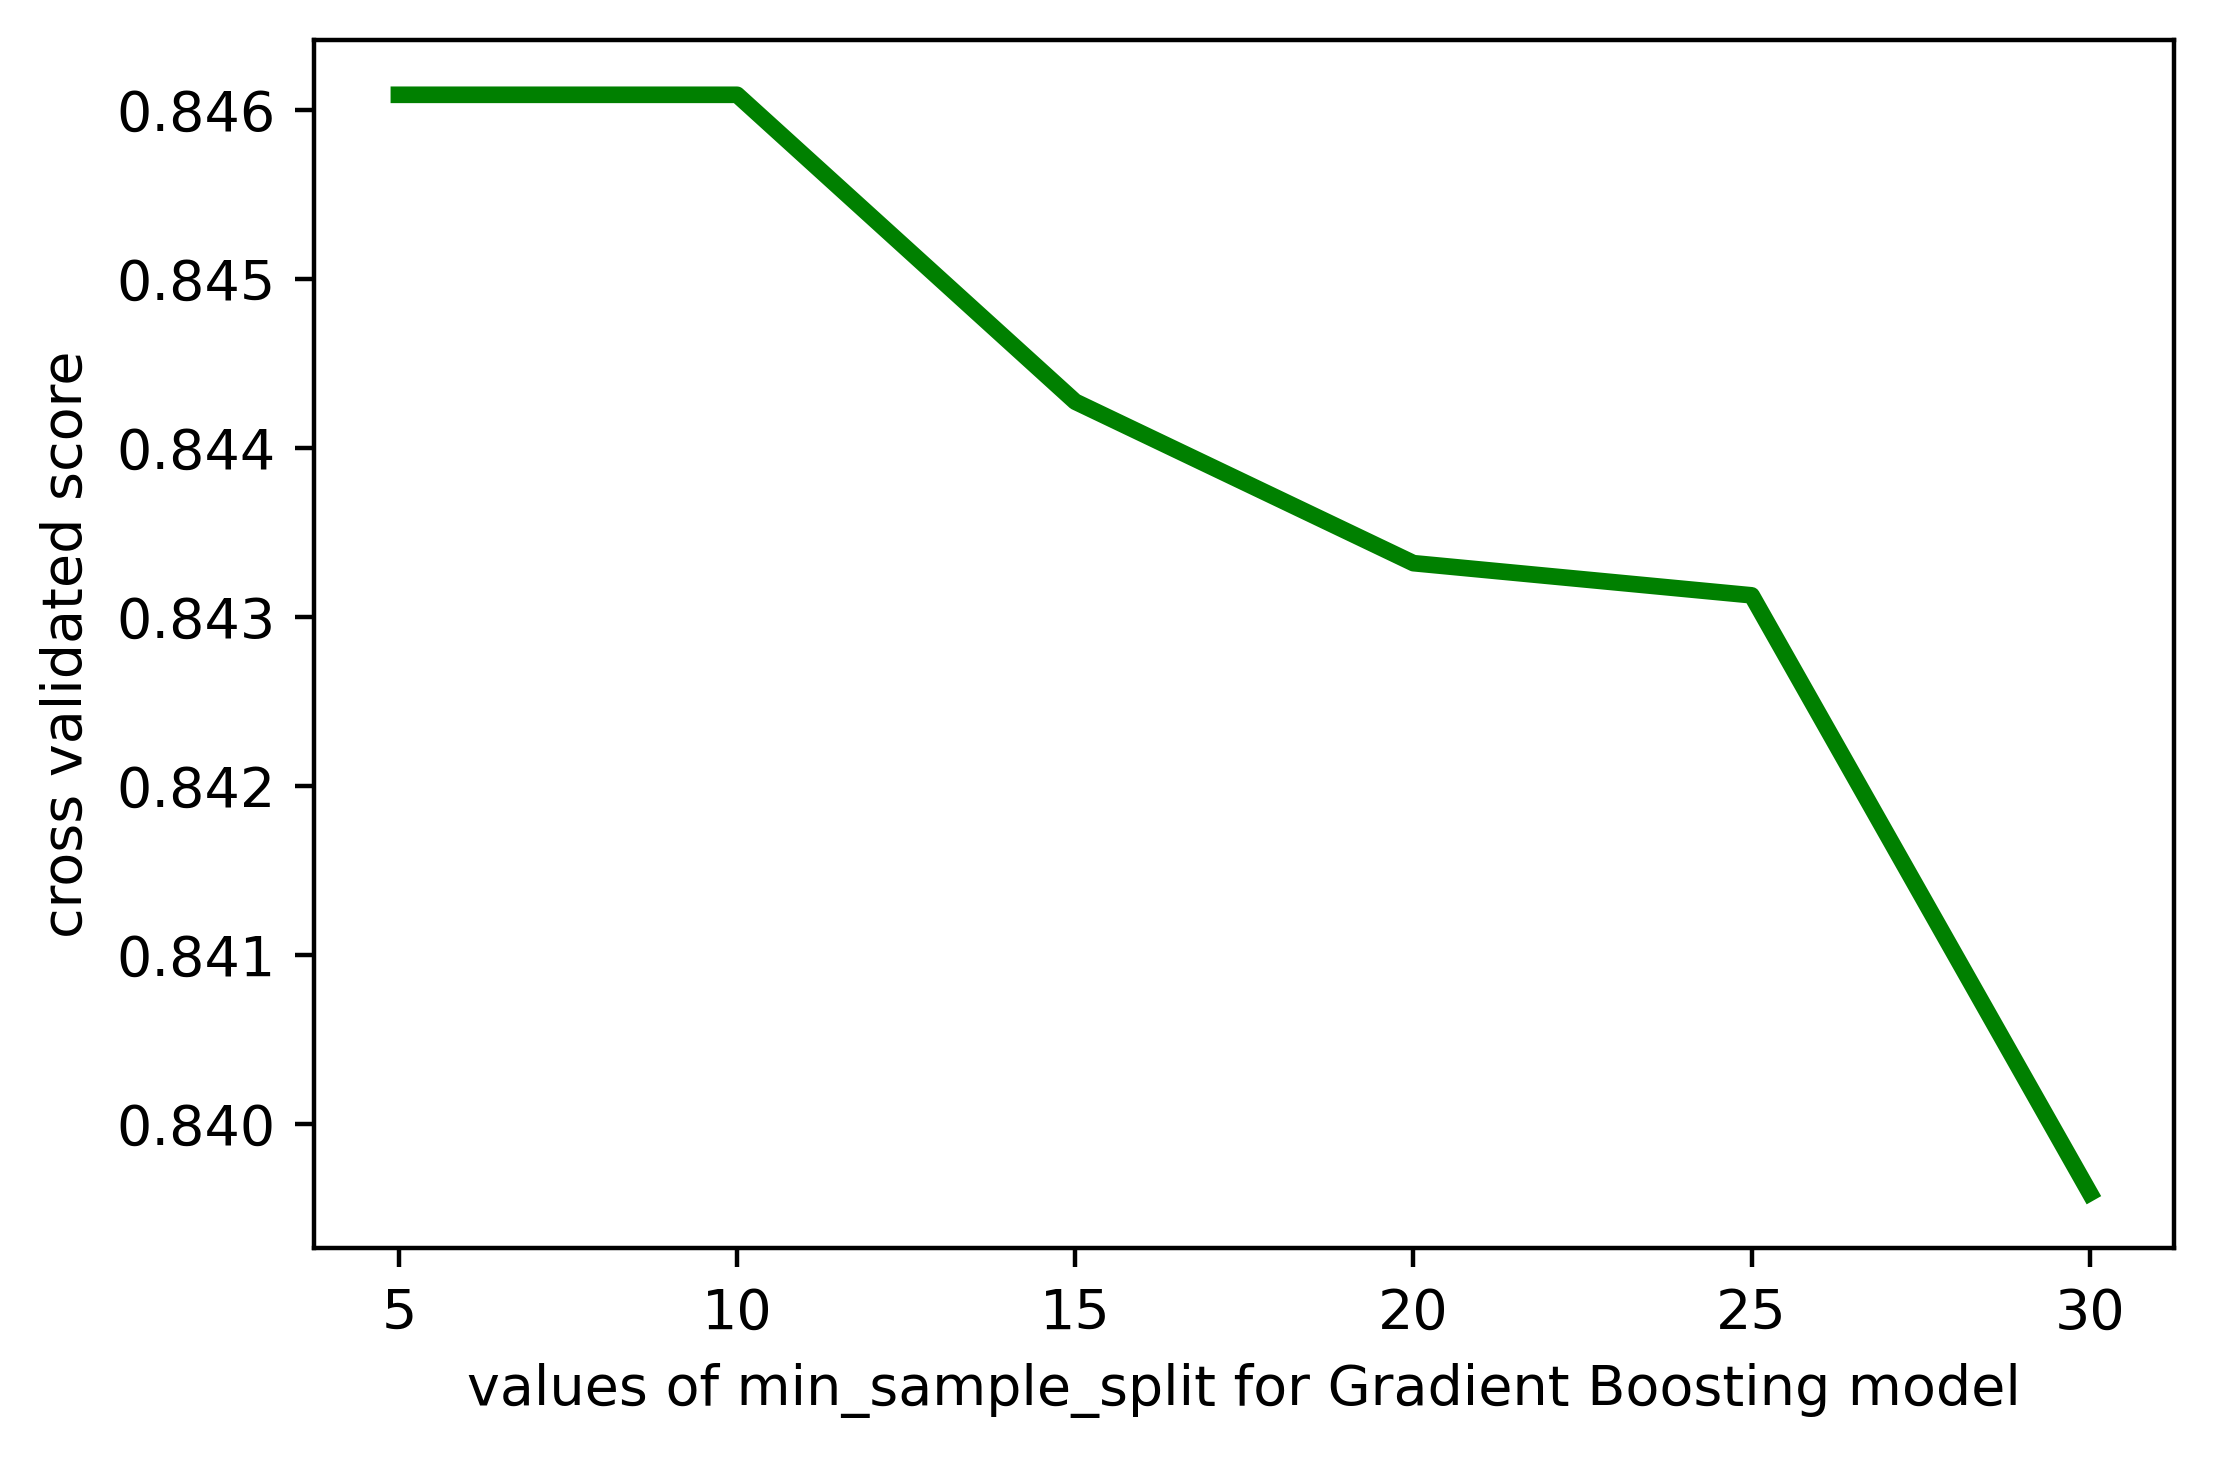

In [55]:
#plot the value of minimum sample split for GBDTClassifier (x-axis) versus the cross validated accuracy (y-axis)

x = [5, 10, 15, 20, 25, 30]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of min_sample_split for Gradient Boosting model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/GBDT_strat_min_samples_split_values_used.svg', format = 'svg', dpi = 400)
plt.show()

In [56]:
#estimation performance accuracy for varied value of minimum sample leaf

#x = x_train_norm
#y =  y_train
K1 = [1, 5, 10, 15, 20, 25, 30]
n_score = []
# loop through range  values of minimum sample leaf
for x1 in K1:
    #mpement  GBDTClassifier with minimum sample leaf
    classifier_score =  GradientBoostingClassifier(n_estimators = 80, max_depth = 25, min_samples_split = 5, min_samples_leaf = x1, learning_rate = 0.1, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.8379683553666032, 0.8460898935499953, 0.8414072073355356, 0.8423624997945509, 0.8422684497818587, 0.8390187022559219, 0.836726073402839]


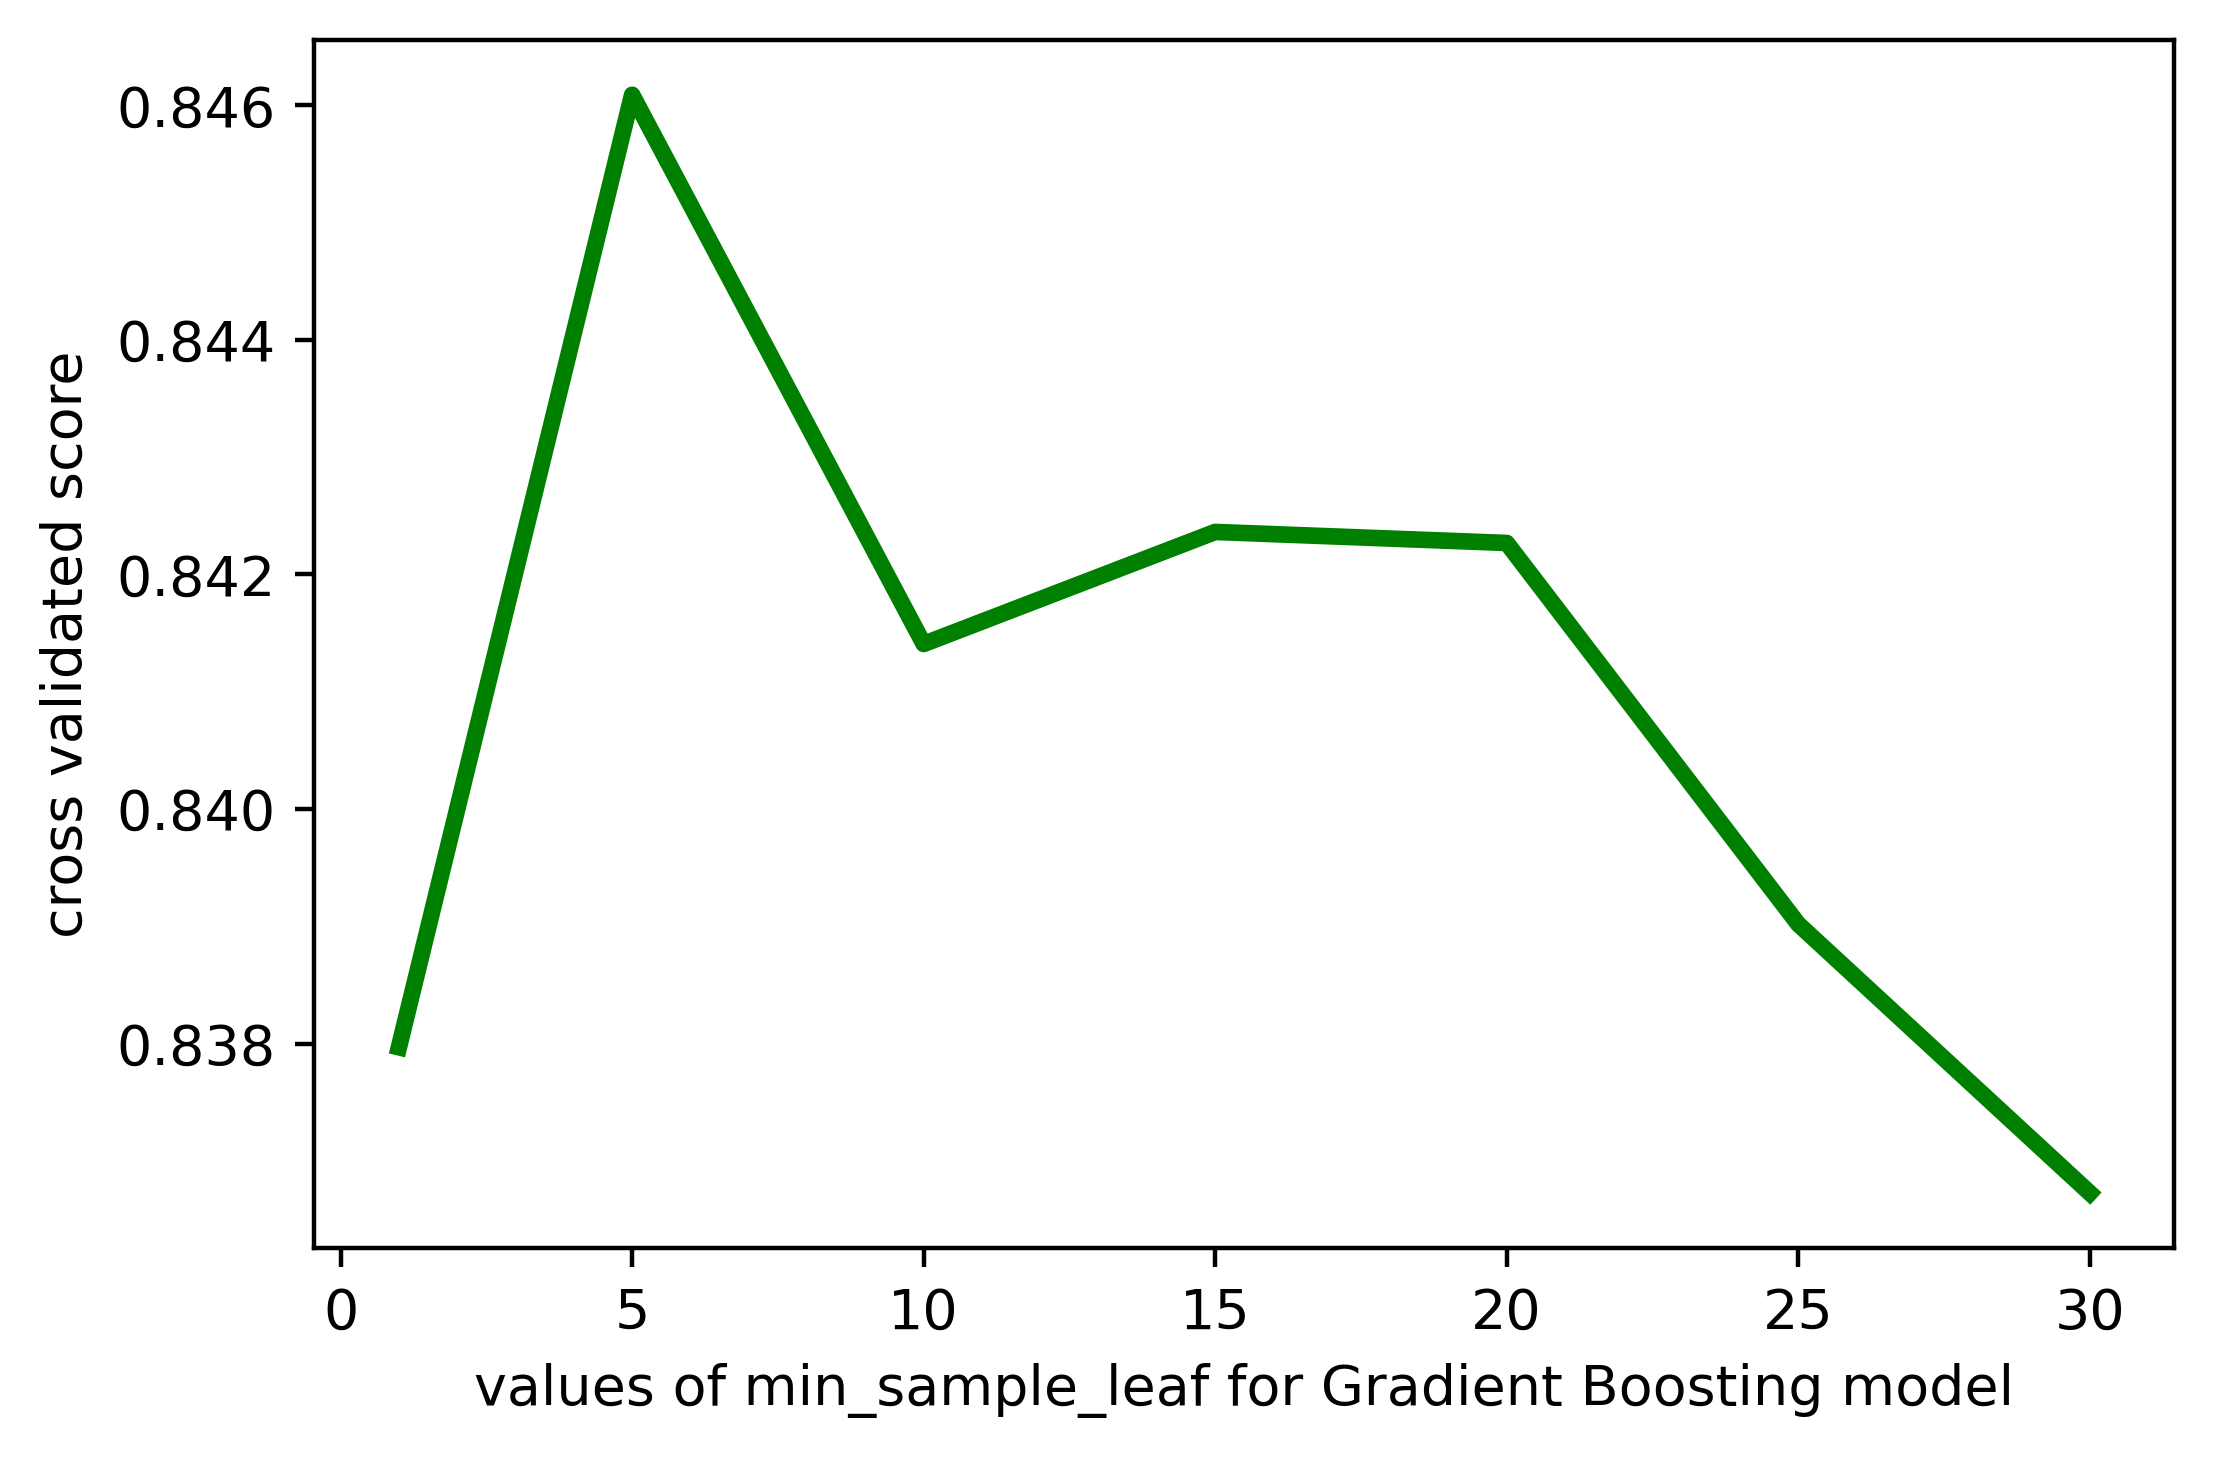

In [57]:
#plot the value of minimum sample leaf for GBDTClassifier (x-axis) versus the cross validated accuracy (y-axis)

x = [1, 5, 10, 15, 20, 25, 30]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of min_sample_leaf for Gradient Boosting model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/GBDT_strat_min_samples_leaf_values_used.svg', format = 'svg', dpi = 400)
plt.show()

In [89]:
#estimating performance accuracy for varied value of learning rate

#x = x_train_norm
#y =  y_train
K1 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
n_score = []
# loop through range  values of learning rate
for x1 in K1:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score =  GradientBoostingClassifier(n_estimators = 80, max_depth = 25, min_samples_split = 5, min_samples_leaf = 5, learning_rate = x1, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.8288915247241959, 0.8374906178264038, 0.8403580474852121, 0.8410269896143218, 0.841312426837308, 0.8439871909361354, 0.8415039053582939, 0.8436046904476233, 0.8443699653567235, 0.8460898935499953]


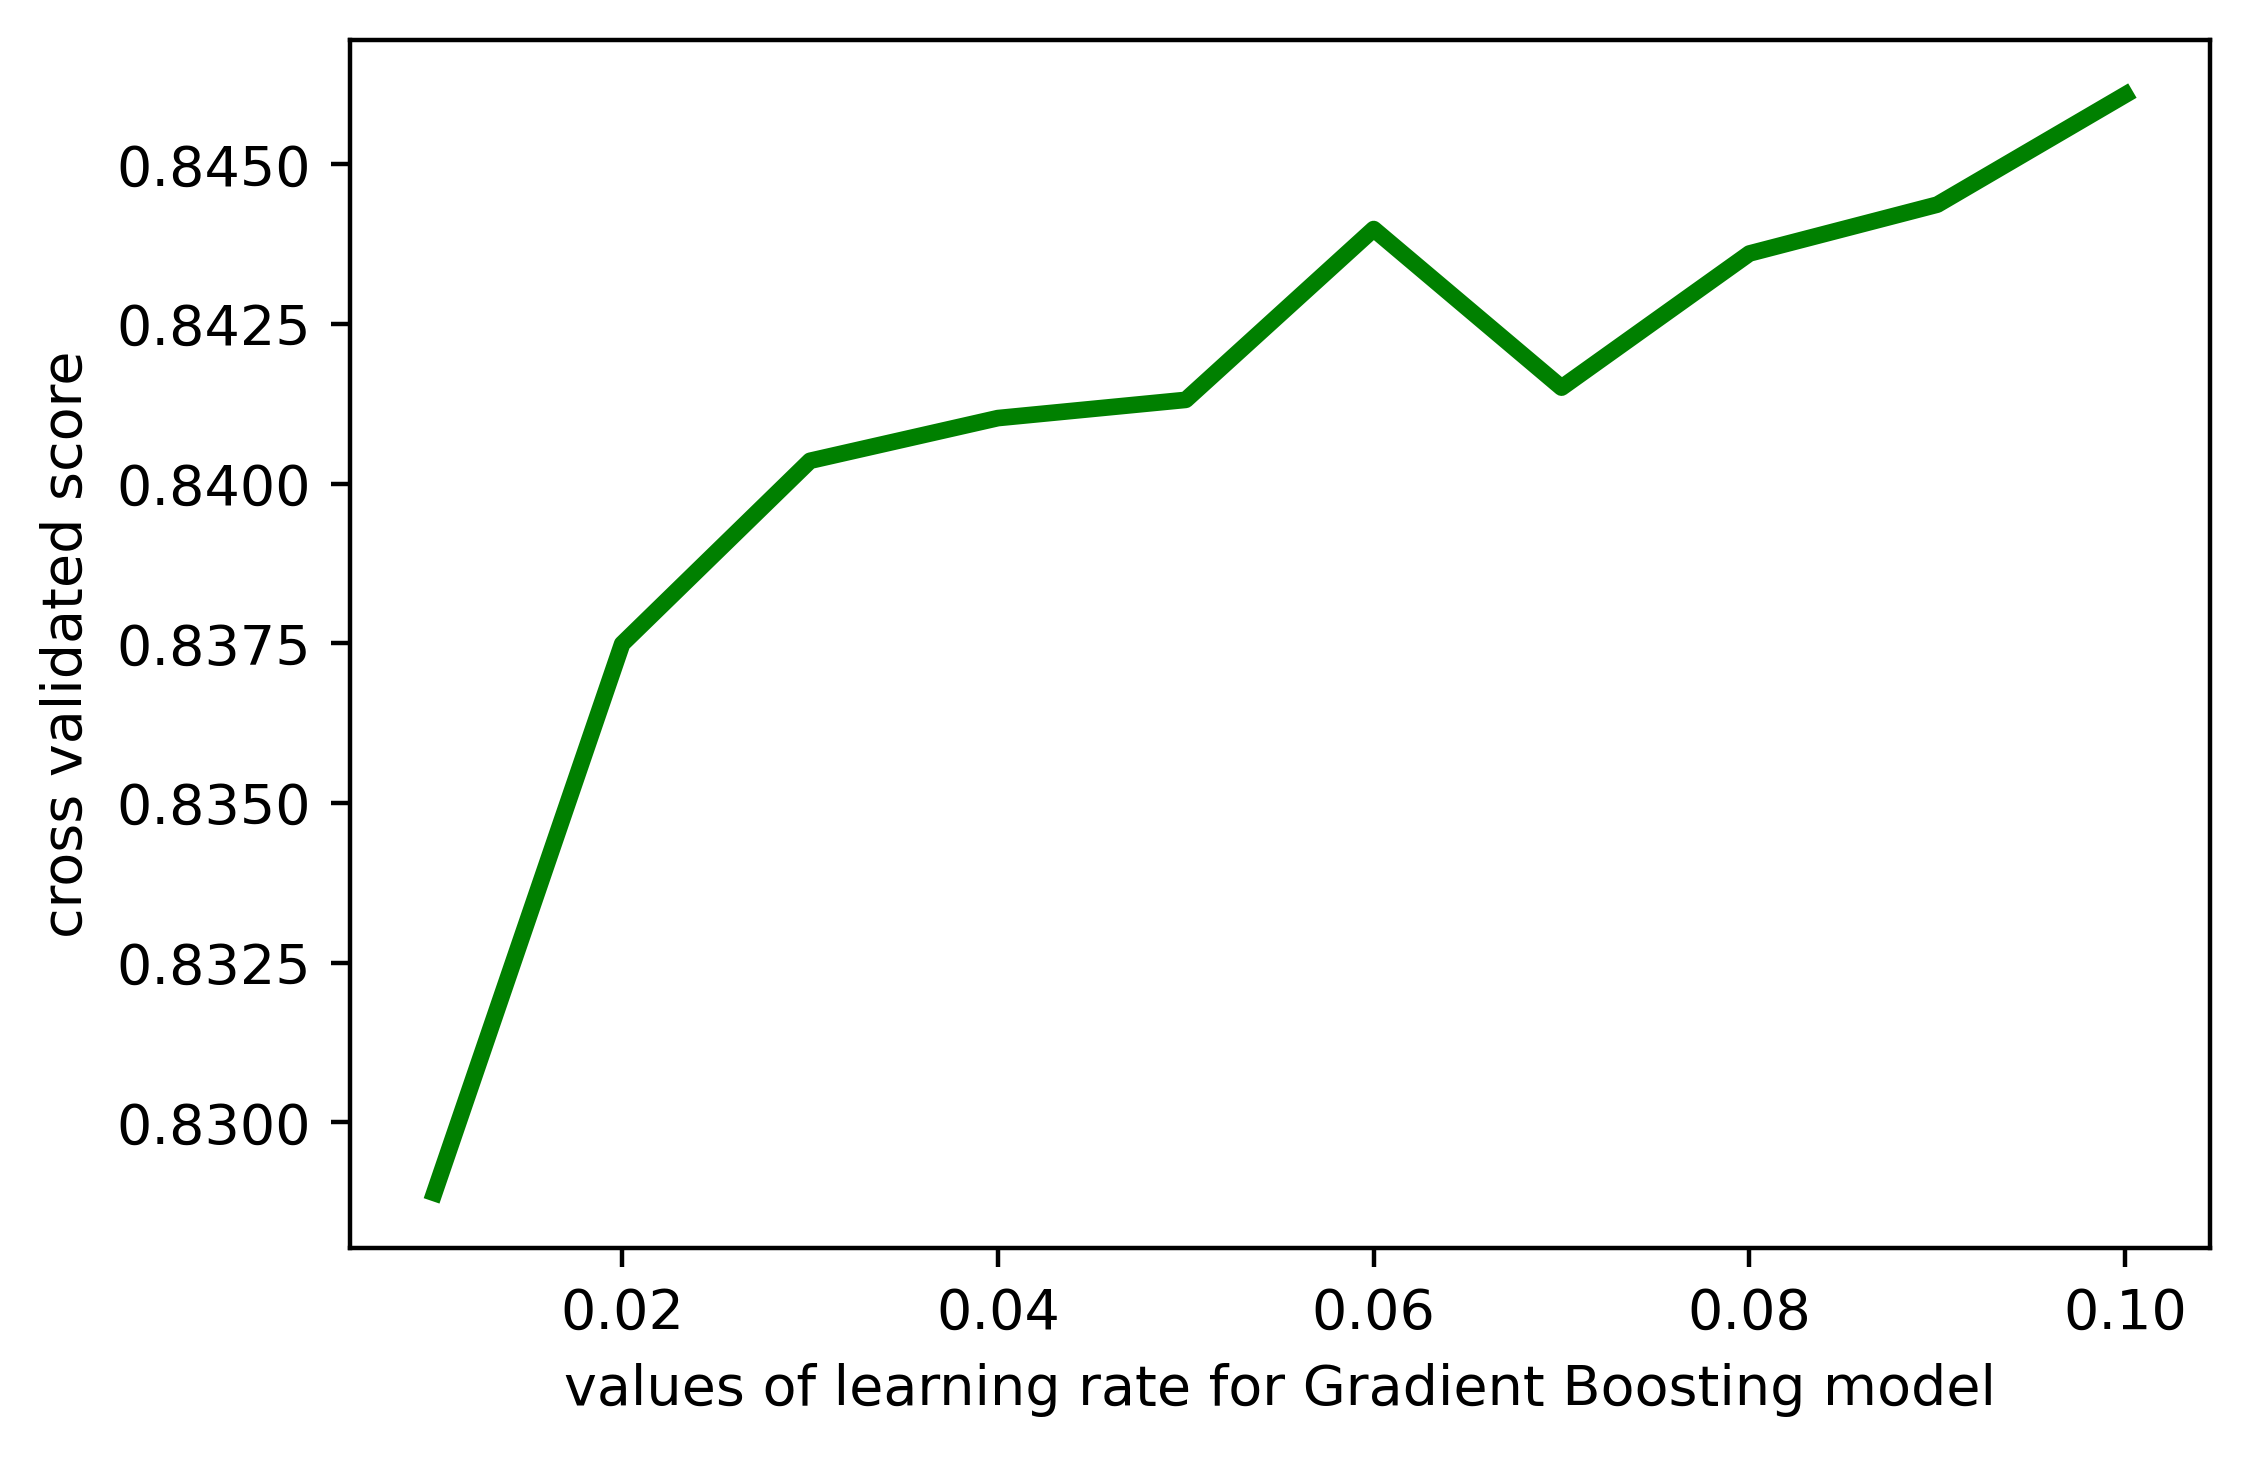

In [90]:
#plot the value of n_estimators for RandomForestClassifier (x-axis) versus the cross validated accuracy (y-axis)

x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of learning rate for Gradient Boosting model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/GBDT_strat_learning_rate.svg', format = 'svg', dpi = 400)
plt.show()

In [97]:
pred_labels = pd.read_excel("a_strat_gbdt_predictn.xlsx")

In [98]:
pred_labels

,number,gamma,density,vp,vs,true laballed,gbdt pred
0,7959,75.9976,2.951230,6531.204644,3896.609949,5,5
1,2070,87.4757,2.674858,5582.433941,3646.529719,0,0
2,1453,138.2970,2.685794,5355.230275,3658.536585,0,0
3,6308,195.3910,2.690002,5724.462537,3783.102144,3,3
4,7985,50.8303,2.936022,6570.302234,3917.471925,5,5
...,...,...,...,...,...,...,...
2612,773,82.1184,2.683728,5610.972569,3690.036900,0,0
2613,8175,109.0740,2.844430,6132.461161,3783.102144,4,4
2614,7276,136.1770,2.890836,6045.137023,3712.871287,4,4
2615,7683,73.5714,3.002748,6457.167456,3900.156006,5,5


In [99]:
strat_gbdt_predictn = pred_labels.sort_values("number", axis= 0, ascending = True)

In [100]:
strat_gbdt_predictn

,number,gamma,density,vp,vs,true laballed,gbdt pred
1401,14,49.9463,2.633790,5586.592179,3654.080390,0,0
1048,16,34.2521,2.654724,5753.298558,3678.273664,0,0
599,18,40.0909,2.639526,5804.953560,3677.822729,0,0
2103,32,40.0537,2.630246,5789.270552,3768.370808,0,0
385,33,42.9545,2.641500,5815.456190,3774.059630,0,0
...,...,...,...,...,...,...,...
1864,13069,59.1872,2.655346,5942.947702,3827.018752,6,6
2299,13070,68.1559,2.686014,5895.299481,3835.826621,6,6
2199,13072,77.6449,2.653874,5923.234876,3836.317136,6,6
911,13079,59.7361,2.629264,5804.055100,3811.944091,6,6


In [103]:
#writing to excel
from pandas import ExcelWriter
sorted_gbt_stra_pred = pd.ExcelWriter('Desktop\sorted_gbt_stra_pred.xlsx')
strat_gbdt_predictn.to_excel(sorted_gbt_stra_pred)
sorted_gbt_stra_pred.save()